### Markov Chain Lab

Consider the Subway rat above.  Add two tracks to the right of Track C, labeling them Track D and Track E.  In this situation, treat Track A as an absorbing state.  If the rat is on any track other than Tracks A or E, it has probability 0.5 of remaining on that track, probability 0.25 of moving left, and probability 0.25 of moving right.  For Track E, assume probability 0.5 of remaining on that track, and probability 0.5 of moving left.  

Write out the matrix of Markov transition probabilities.  Iterate this matrix forward as many times as is necessary for you to determine empirically its limit.  Based on this limit, what can you say about the evolution of the system if the rat begins on Track C?  How about Track D?  Is there a general conclusion you can draw?

In [1]:
%matplotlib inline
import warnings
import numpy as np
import pandas as pd
import pandas_datareader.data as web
import datetime as dt
import fix_yahoo_finance
from numpy import random
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels as sm
import statsmodels.formula.api as smf
import statsmodels.api as sma
import patsy
from statsmodels.graphics.api import abline_plot
import numpy.linalg as linalg
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
from tabulate import tabulate
warnings.simplefilter('ignore')
sns.set(context='notebook', style='whitegrid', palette='deep', font='sans-serif', font_scale=1, rc=None)

/Users/timothysavage/anaconda/lib/python3.5/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
# Let's apply this to something non-deterministic using a NYC Subway rat.
# If on Track A, Pr(stays) = 1/2 and Pr(moves to B) = 1/2
# If on Track B, Pr(stays) = 1/2, Pr(move to A) = 1/4, and Pr(moves to C) = 1/4
# If on Track C, Pr(stays) = 1/2 and Pr(moves to C) = 1/2

print("A Rat in a NYC Subway Tunnel")
table = [[" ", "Track A", "Track B", "Track C", "Track D", "Track E"],
        ["Track A", "1", "0", "0", "0", "0"],
        ["Track B", "1/4", "1/2", "1/4", "0", "0"],
        ["Track C", "0", "1/4", "1/2", "1/4", "0"],
        ["Track D", "0", "0", "1/4", "1/2", "1/4"],
        ["Track E", "0", "0", "0", "1/2", "1/2"]]
print(tabulate(table, tablefmt="fancy_grid", numalign = "center"))
print()

MT = np.matrix('1 0 0 0 0; 0.25 0.5 0.25 0 0; 0 0.25 0.5 0.25 0; 0 0 0.25 0.5 0.25; 0 0 0 0.5 0.5')
print("As an Numpy matrix")
print(MT)

A Rat in a NYC Subway Tunnel
╒═════════╤═════════╤═════════╤═════════╤═════════╤═════════╕
│         │ Track A │ Track B │ Track C │ Track D │ Track E │
├─────────┼─────────┼─────────┼─────────┼─────────┼─────────┤
│ Track A │ 1       │ 0       │ 0       │ 0       │ 0       │
├─────────┼─────────┼─────────┼─────────┼─────────┼─────────┤
│ Track B │ 1/4     │ 1/2     │ 1/4     │ 0       │ 0       │
├─────────┼─────────┼─────────┼─────────┼─────────┼─────────┤
│ Track C │ 0       │ 1/4     │ 1/2     │ 1/4     │ 0       │
├─────────┼─────────┼─────────┼─────────┼─────────┼─────────┤
│ Track D │ 0       │ 0       │ 1/4     │ 1/2     │ 1/4     │
├─────────┼─────────┼─────────┼─────────┼─────────┼─────────┤
│ Track E │ 0       │ 0       │ 0       │ 1/2     │ 1/2     │
╘═════════╧═════════╧═════════╧═════════╧═════════╧═════════╛

As an Numpy matrix
[[ 1.    0.    0.    0.    0.  ]
 [ 0.25  0.5   0.25  0.    0.  ]
 [ 0.    0.25  0.5   0.25  0.  ]
 [ 0.    0.    0.25  0.5   0.25]
 [ 0.    0.  

In [3]:
rat = np.matrix('0 0 1 0 0')
print(rat * np.linalg.matrix_power(MT, 100000))

[[ 1.  0.  0.  0.  0.]]


### ARMA Lab Using Amazon

Grab Amazon stock data and calculate returns and volatility, the square of daily returns, $r_t^2$, a value that is non-negative.  Next, generate a measure that is the square root of the square of daily returns, which is also non-negative.  This is typically thought of as measure of the volatility of returns.  Generate an autocorrelation graph for volatility.  Is volatility autocorrelated?  

[*********************100%***********************]  1 of 1 downloaded

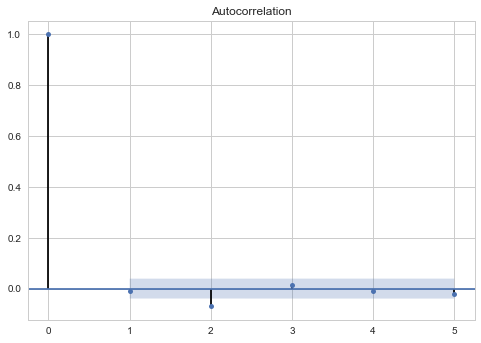

In [4]:
# Use Amazon

start, end = "2006-01-01", "2015-12-31"
amzn = web.get_data_yahoo('amzn', start=start, end=end)['Adj Close']
amzn_returns = np.log(amzn / amzn.shift(1))
amzn_returns = amzn_returns.dropna()

fig = plt.figure(figsize=(8,6))
fig = sma.graphics.tsa.plot_acf(amzn_returns, lags=5)

Date
2006-01-04    0.006960
2006-01-05    0.008430
2006-01-06    0.004606
2006-01-09    0.016641
2006-01-10    0.030845
Name: Adj Close, dtype: float64


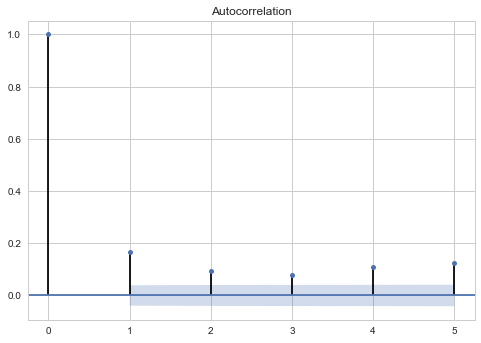

In [5]:
vol = np.sqrt(amzn_returns ** 2)
print(vol.head())
fig = plt.figure(figsize=(8,6))
fig = sma.graphics.tsa.plot_acf(vol, lags=5)